# Methods of Component Analysis

## Univariate analysis: observations, data types, location and spread

#### Observations

Statistics and data science work on observations that are made. Each observation is a data unit, corresponding to a thing, an individual or a point in time or space. For each observation one or more **measurements** may be made.

#### Measurements

A measurement yields a **value** (a score) on a certain **variable**.

#### Variables

A variable corresponds to a certain **type** of measurement


An observation is the data unit, an instance, an individual 

- Measurements
- Data types
  - characteristic
    - numerical
      - integer
      - decimal
    - categorical
      - nominal
      - dichotomous
      - ordinal
  - relational
    - similarity
    - separation
    - connectivity
- Distribution
  - uniform
  - normal
  - $\chi^2$
  - F
  - ...
- Location
  - Median
  - Mean
- Spread
  - Quantiles/quartiles
  - IQR
  - Standard deviation
  - Variance
- Distribution (higher) moments
  - skew
  - kurtosis
  - ...
- Sampling
  - (un)biased


#### The median

The median is the middle of the distribution. It is the value where 50% of the measurements lie below that value and 50% lie above. In the case of an uneven number of observations, one of the observations *is* the median, while in the case of an even number of observations, the median lies in between. The median can be calculate as

In [1]:
observations = [4,6,3,6,4,7,8,9,8,4,2,3,6,7,5,3,2,7,8,9,6,5]
observations.sort()

n = len(observations)
median = (observations[(n-1) // 2] + observations[n // 2]) / 2
    
print(observations)
print(median)

[2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9]
6.0


#### The mean

The sample mean is the sum of the measurements divided by the number of them:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i
$$

The population mean $\mu$ is the sum of every value possible as measurement times the probability that that value is observed:

$$
\mu = \int_{-\infty}^{\infty} x p(x) dx
$$

The mean is the center of the distribution in the way that subtracting this value from all measurements, the sum of the negative values and the positive values will come to exactly zero. If you were to take a stick (without mass) and mark every measurement with a weight, then the mean would be the balancing point. Alternatively, if you connect a rubber band to each data point, and hold all rubber bands, then the mean is the point you'll end up, being pulled equally to the positive and the negative side.

In [2]:
mean = sum(observations) / len(observations)

deviations = [ x_i - mean for x_i in observations ]

print("Mean:", mean)
print("Negative deviations:", sum(d_i for d_i in deviations if d_i < 0))
print("Positive deviations:", sum(d_i for d_i in deviations if d_i > 0))


Mean: 5.545454545454546
Negative deviations: -20.454545454545464
Positive deviations: 20.454545454545446


#### The standard deviation

The standard deviation is the mean deviation from the mean and is an important measure for spread. For a sample it is given as:

$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

The population standard deviation is usually written as $\sigma$ and can be written as a sum over the entire domain using probabilities, just like the population mean:

$$
\sigma = \sqrt{ \int_{-\infty}^{\infty} (x-\mu)^2p(x)dx }
$$

If we consider a setting with a rubber band connected to each measurement, and being pulled to the mean value, then the standard deviation is a way of expressing the average length of each rubber band. However, it may be more convenient to think of the standard deviation as merely the square root of the *variance*, which is more important in (multivariate) analysis.

In [3]:
mean = (1/n) * sum(observations)
standard_deviation = ( (1/(n-1)) * sum((x_i - mean)**2 for x_i in observations))**0.5

print(standard_deviation)

2.197991999796367


#### The variance

The variance is the square of the standard deviation. It is the so-called second central moment of the distribution and for a sample is calculated as (see its appearance in the square root above):

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

The population variance, accordingly, is given as

$$
\sigma^2 = \int_{-\infty}^{\infty} (x-\mu)^2p(x)dx 
$$

The variance is an important measure of spread, but may come less intuitive at first. This is where the rubber bands analogy becomes really useful. Note that a rubber band responds to stretching with a force. This force is related to the tension, and this tension builds up with the square of the length. That is known as Hooke's Law, because it was discovered by Robert Hooke. So if we have a number of points and rubber bands attached to them, these rubber bands pull us the position of the mean, where the forces to either side are balanced. The rubber bands are still stretched, though, and we can talk about the tension. The total tension is the sum of the tensions of all individual rubber bands, and the mean tension is ... the variance.

Within the context of the standard deviation, we did not mention dividing by $n-1$ in stead of $n$. These are called the *degrees of freedom* or 'the number of pieces of information still in the data'. Note that the $n-1$ is only there for the *sample* variance, and not for the *population* variance. In fact, if we were to know the population mean, then we would also use $n$ and not $n-1$ to calculate the variance. The difference is knowing the mean or having to estimate it from the data first. If that is the case, it will cost us one unit of information, so after that, the data will have only $n-1$ pieces of data left for the estimation of the second moment. 

In [4]:
mean = (1/n) * sum(observations)
variance = (1/(n-1)) * sum((x_i - mean)**2 for x_i in observations)

print(variance)

4.831168831168833


## Linear algebra

https://en.wikipedia.org/wiki/Linear_algebra

_Linear algebra is the branch of mathematics concerning linear equations, linear functions and their representations in vector spaces and through matrices._

In a way, linear algebra provides a formal language for representing concepts and ideas involving _vectors_ and _matrices_. A language in written form requires a system for notation. We here use the following notations: 

* italic lowercase: single number (scalars)
* boldface lowercase: vector
* boldface uppercase: matrix

### Vectors

A vector is an ordered set of numbers: each number is accessible by its position or *index*. It may be noted that this is quite the same as a list in Python or a one-dimensional array in quite any computer language. The term vector is typically taken to mean a *column*-vector, unless specified otherwise. This means that the numbers are represented as a stack, with index $1$ at the top and the $n$th index at the bottom. Dots are typically used to avoid explicitly writing all the elements in between

Multiple observations: 
$$ x_1 \ldots x_n $$

Observation vector: 
$$ {\bf{x}} = \begin{pmatrix} x_1 \\ \vdots \\ x_n \end{pmatrix} $$

Transposed: 
$$ {\bf{x}}^T = \begin{pmatrix} x_1 & \ldots & x_n \end{pmatrix} $$

Inner product: 
$$ {\bf{x}}^T {\bf{x}} = x_1^2 + \ldots + x_n^2 = \sum_{i=1}^{n} x_i^2 $$

Mean:
$$ \bar{x} = \frac{1}{n} {\bf{1}}^T {\bf{x}} = 
\frac{1}{n} \begin{pmatrix} 1 & \ldots & 1 \end{pmatrix} {\bf{x}} =
\frac{1}{n} \sum_{i=1}^n 1x_i = ({\bf{1}}^T {\bf{1}})^{-1} {\bf{1}}^T {\bf{x}} $$

Variance:
$$ s_x^2 = \frac{1}{n-1} ({\bf{x}} - \bar{x} {\bf{1}})^T ({\bf{x}} - \bar{x} {\bf{1}})
= \frac{1}{n-1} ({\bf{x}}^T{\bf{x}} - \bar{x}^2{\bf{1}}^T{\bf{1}})
$$

## Two variables: covariance, correlation and regression



- Coupled measurements
- Location
- Spread
- Relation
  - Covariance
  - Correlation
  - Regression

The first step in multivariate analysis is considering that multiple measurements are done for each observation. An observation can still be anything, provided that it is defined clearly. 


Consider two variables $x$ and $y$ with means $\mu_x$ and $\mu_y$ and standard deviations $\sigma_x$ and $\sigma_y$. 


### Covariance

Covariance is a measure for how *much* one variable varies with another one (in a linear sense).

### Correlation

Correlation is a measure for how *strongly* one variable varies with another, or, in other words, how much information one variable gives about the other one.

## Simple Linear regression

Linear regression is aimed at finding the linear relationship that best predicts one variable given the values of another. The variable that is predicted is called the dependent variable, the response or the regressand. The one used to predict is the independent variable, the input, or the regressor. In the case of a single input, this is sometimes called *simple linear regression*.

### When to use

The use cases for linear regression are 1. prediction of variables from other variables that are more easily obtained, and 2. to test if two variables are linearly related

### The model

The model is written with the $i$th response on the left hand side (LHS) as a function of the intercept $a$, the slope $b$ and the $i$th input $x_i$. The right hand side also contains a term $\epsilon_i$ that captures the deviation of the response from the model. The solution in $a$ and $b$ requires that the sum of the deviations is 0 and that the variance of the deviations is as small as possible, i.e. the solution having the least sum-of-squares of deviations.

$$
y_i = a + b x_i + \epsilon_i
$$

### Solving the model

To solve this model, first note that 1. the intercept depends on the location of the data, but 2. the slope does not. This means that centering the data by subtracting the means from $x$ and $y$ gives an equation in which the intercept is zero:

$$
y_i^* = b x_i^* + \epsilon_i
$$

Dividing by $x_i$ would give $b$ if it wasn't for $\epsilon_i$. Of course we also have multiple values, and we want to use all of them. Using some linear algebra we can easily solve this *and* understand how the solution deals with the error terms. We begin with writing the equation in its vector form (for the centered values):

$$
{\bf{y}} =
\begin{pmatrix} y_1 \\ \vdots \\ y_n \end{pmatrix} = 
b {\bf{x}} + {\bf{\epsilon}} =
b \begin{pmatrix} x_1 \\ \vdots \\ x_n \end{pmatrix} +
\begin{pmatrix} \epsilon_1 \\ \vdots \\ \epsilon_n \end{pmatrix}
$$

Now we first subtract the error vector from both sides:

$$
{\bf{y}} - {\bf{\epsilon}} = b {\bf{x}}
$$

We can't divide by the vector $\bf{x}$, but we can multiply both sides with the transpose of it:

$$
{\bf{x}}^T{\bf{y}} - {\bf{x}}^T{\bf{\epsilon}} = b {\bf{x}}^T{\bf{x}}
$$

Like this, because of the dot products, we get a scalar equation, i.e. an equation with only regular numbers and no vectors. But look closely: because the variables were centered, the first term ${\bf{x}}^T{\bf{y}}$ is equal to the covariance between $x$ and $y$ and the last one is the variance of $x$. Likewise, the middle term is the covariance between $x$ and $\epsilon$. However, $\epsilon$ is a random error and must have zero correlation, and thus a covariance of zero, with $x$! It drops from the equation, and dividing by the variance of $x$ gives the expression for the slope $b$:

$$
b = ({\bf{x}}^T{\bf{x}})^{-1} {\bf{x}}^T{\bf{y}} = \frac{\text{cov}(x,y)}{\text{var}(x)}
$$

##### Solving with the slope included

In statistical texts on regression, the slope is typically determined first on the centered data and then the intercept is solved for. However, with linear algebra, it becomes trivial to solve both simultaneously. We write 

$$
{\bf{y}} = a {\bf{1}} + b {\bf{x}} + {\bf{\epsilon}} = 
\begin{pmatrix} {\bf{1}} & {\bf{x}} \end{pmatrix}
\begin{pmatrix} a \\ b \end{pmatrix} + {\bf{\epsilon}}
$$

and from there come through

$$
\begin{pmatrix} {\bf{1}}^T \\ {\bf{x}}^T \end{pmatrix}{\bf{y}} = 
\begin{pmatrix} {\bf{1}}^T \\ {\bf{x}}^T \end{pmatrix}\begin{pmatrix} {\bf{1}} & {\bf{x}} \end{pmatrix}
\begin{pmatrix} a \\ b \end{pmatrix} =
\begin{pmatrix} 
{\bf{1}}^T{\bf{1}} & {\bf{1}}^T{\bf{x}} \\ 
{\bf{x}}^T{\bf{1}} & {\bf{x}}^T{\bf{x}} \\ 
\end{pmatrix} 
\begin{pmatrix} a \\ b \end{pmatrix}
$$

to

$$
\begin{pmatrix} a \\ b \end{pmatrix} =
\begin{pmatrix} 
{\bf{1}}^T{\bf{1}} & {\bf{1}}^T{\bf{x}} \\ 
{\bf{x}}^T{\bf{1}} & {\bf{x}}^T{\bf{x}} \\ 
\end{pmatrix}^{-1} 
\begin{pmatrix} {\bf{1}}^T {\bf{y}} \\ {\bf{x}}^T {\bf{y}} \end{pmatrix}
$$

### Example: Regression of National Average IQ on Body metric data

The file `IQ.dat` contains average IQ values determined for a large range of countries and several other variables that may be related in one way or the other. It is interesting to see if there are correlations. Note that these data and conclusions that are drawn from it are quite controversial. Some have seen reasons in it to conclude that African people (associated with warmer countries) have lower IQ values _on average_. In that regard it is most important to note that 1. IQ tests cannot easily be standardized for cross-cultural settings, 2. representative sampling is harder in countries with underdeveloped infrastructure, and 3. economic factors and educational systems will play an important role in the outcome of IQ tests on a national level.


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    import matplotlib.collections as mc

iq = pd.read_csv("IQ.dat", sep=" ", header=0)
print(iq.columns)
print(iq.shape)
iq.head()

IndentationError: unexpected indent (1295202297.py, line 4)

In [ ]:
# test
x = iq.M_Height
X = np.stack((np.ones(iq.shape[0]), x), axis=1)
y = iq.IQ

X.T.shape

In [ ]:
X.T @ y

In [ ]:
# Hardcore
x = iq.M_Height
X = np.stack((np.ones(iq.shape[0]), x), axis=1)
y = iq.IQ
a, b = np.linalg.inv(X.T @ X) @ X.T @ y
# Fit:
r2 = 1 - (a + b * x).var() / y.var()
print("\nIntercept: {:.3f}\nSlope:     {:.3f}\nr^2:         {:.3f}".format(a, b, r2))

# The regression line
newx = np.linspace(x.min(), x.max())
plt.plot(newx, a + b * newx, linewidth=3, c="orange")

# The residuals
segs = np.array(((x, x), (y, a + b * x))).T
axes = plt.axes()
axes.add_collection(mc.LineCollection(segs, color="red", linewidths=0.75))

# The data
plt.scatter(x, y)
plt.xlabel("National average male length (m)")
plt.ylabel("National average IQ")

# The individual means
plt.axvline(x.mean(), ls='--', lw=0.75)
plt.axhline(y.mean(), ls='--', lw=0.75)

plt.show()

We can switch the regressor and regressand to see what the effect is on the regression line, the residuals and the correlation:

In [ ]:
Y = np.stack((np.ones(iq.shape[0]), y), axis=1)
ay, by = np.linalg.inv(Y.T @ Y) @ Y.T @ x
# Fit:
r2y = 1 - (ay + by * y).var() / x.var()
print("\nIntercept: {:.3f}\nSlope:     {:.3f}\nr^2:         {:.3f}".format(ay, by, r2y))

# The regression line
newy = np.linspace(y.min(), y.max())
plt.plot(newx, a + b * newx, linewidth=3, c="#aaaaaa")
plt.plot(ay + by * newy, newy, linewidth=3, c="orange")

# The residuals
segs = np.array(((x, ay + by * y), (y, y))).T
axes = plt.axes()
axes.add_collection(mc.LineCollection(segs, color="red", linewidths=0.75))

# The data
plt.scatter(x, y)
plt.xlabel("National average male length (m)")
plt.ylabel("National average IQ")

# The individual means
plt.axvline(x.mean(), ls='--', lw=0.75)
plt.axhline(y.mean(), ls='--', lw=0.75)

plt.show()

In [ ]:
# Using scikit-learn
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x[:, None], y)

# Results are the same:
print(model.intercept_, a)
print(model.coef_[0], b)



## Multilinear regression

https://en.wikipedia.org/wiki/Linear_regression (_Note that the Wikipedia page just calls this_ linear regression, _while the case of one independent variable is called_ simple linear regression.)

In multilinear regression, there is one response ($y$) that is predicted using several input variables ($x_1$ through $x_k$):

$$
y_i = a + b_1 x_{1i} + \ldots + b_k x_{ki} + \epsilon_i 
$$

$$
{\bf{y}} = 
\begin{pmatrix} {\bf{1}} & {\bf{X}} \end{pmatrix} 
\begin{pmatrix} a \\ b_1 \\ \vdots \\ b_k \end{pmatrix} + {\bf{\epsilon}}
$$

Solving a multilinear model follows the same approach as simple linear regression.

### Example:

In [ ]:
# X = np.stack((iq.Length, iq.Volume), axis=1)
# np.c_[(np.ones(iq.shape[0]), X)]

In [ ]:
# Using the same (IQ) data

X = np.stack((np.ones(iq.shape[0]), iq.Length, iq.Volume), axis=1)
y = iq.IQ

b = np.linalg.inv(X.T @ X) @ X.T @ y

print(b)

# Residuals
ypred = X @ b
residuals = y - ypred

# How much of the variance of y is explained by the model?
# If the relationship is perfect, it's 1 (100%)
R2 = 1 - ypred.var() / y.var()
# The adjusted R2 is corrected for the sample size and number of regressors
adjusted_R2 = 1 - ((1 - R2) * (len(y) - 1) / (len(y) - X.shape[1] - 1))

print(R2, adjusted_R2)

## Multivariate linear regression (MLR)

In Multivariate Linear Regression, the response also contains multiple variables:

$$
{\bf{Y}} = 
\begin{pmatrix} {\bf{1}} & {\bf{X}} \end{pmatrix} 
\begin{pmatrix} 
a_1 & \cdots & a_m\\ 
b_{11} & \cdots & b_{m1} \\ 
\vdots & \ddots & \vdots \\ 
b_{1k} & \cdots & b_{mk} 
\end{pmatrix} + {\bf{E}}
$$

The result is exactly the same as performing individual multilinear regressions for the different response variables.

## Principal Component Analysis (PCA)

https://en.wikipedia.org/wiki/Principal_component_analysis

https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

Principal component analysis can be viewed in different ways, focusing on the statistical properties, the mathematical properties, or the geometric properties. The viewpoint taken is not typically stated explicitly, which may cause some confusion as to what PCA actually is. 

In short, PCA can be seen as a method to analyze or describe the internal structure of a set of observations, with measurements in multiple variables. Typically, these variables are not wholly independent, and each pair of variables has a characteristic covariance and correlation. 

Possibly the simplest view on PCA is this: Consider a set of observations in two variables $x$ and $y$. The mean of $x$ divides the data in two parts of equal weight on left and right. Likewise, the mean of $y$ divides the data in two parts of equal weight above and below. Together, the two means divide the space in four parts. The center is the two-dimensional mean and is the balance point of the data: the data are divided equally above and below, left and right. But the data need not be equally distributed over the _quadrants_. If the upper right and the lower left have more _data weight_ than the upper left and lower right, then there is positive correlation between the two variables. What PCA does is rotating the data so that the data weight is distributed evenly over the four quadrants. Then, the data is balanced left/right, above/below _and_ over the diagonals. The latter means that after the rotation there are no linear correlations between variables anymore.

So, PCA determines a rotation matrix $\bf{P}$, which rotates the data $\bf{X}$, such that the matrix of inner products $({\bf{XP}})^T{\bf{XP}}$ is a diagonal matrix.


#### Mathematically

Consider a series of $n$ observations in $k$ variables. These observations are combined in the data matrix ${\bf{X}}$, which we here assume to be centered, i.e. all variables have a zero mean. The covariance matrix is then given as

$$
{\bf{S}} = \frac{1}{n-1} {\bf{X}}^T{\bf{X}}
$$

PCA then is concerned with the so-called *eigen* decomposition of this matrix, which gives two matrices ${\bf{P}}$ and ${\bf{D}}$, such that the following equation is satisfied:

$$
{\bf{S}} = {\bf{PDP}}^T 
$$

The matrix ${\bf{D}}$ is a *diagonal* matrix, of which the diagonal elements are the *eigenvalues*, which are typically sorted in *descending* order. The matrix ${\bf{P}}$ contains the *eigenvectors* as columns, and this matrix is *orthonormal*, which means that it satisfies the following equation:

$$
{\bf{PP}}^T = {\bf{P}}^T{\bf{P}} = {\bf{I}}
$$

From the properties of matrix and matrix/vector multiplications, it can be seen that the covariance matrix can be written as a sum

$$
{\bf{S}} = \sum_{i=1}^{k} \lambda_i {\bf{p}}_i{\bf{p}}_i^T
$$

$$
{\bf{S}} = \sum_{i=1}^{m} \lambda_i {\bf{p}}_i{\bf{p}}_i^T + 
\sum_{j=m+1}^{k} \lambda_i=j {\bf{p}}_j{\bf{p}}_i^T
$$

$$
{\bf{P}}^T{\bf{SP}} = {\bf{D}} = \frac{1}{n-1} {\bf{P}}^T{\bf{X}}^T{\bf{XP}}
$$

#### Considerations

PCA acts on the matrix of inner products, which corresponds to the *covariances*. If the variables are heterogeneous (of diverse origin) and have (quite) different *variances*, then the resulting components will be dominated by the variables with the highest variance. In that case it may be better to scale the data to unit variance by dividing all values by their corresponding standard deviations. These scaled values are then *Z-scores* and the covariance matrix of these is actually the *correlation matrix*. However, this is **not** a good idea if the variables are *homogeneous*. An example of that is if the variables can be considered coordinates in a Cartesian space.



#### Examples

##### Wine

In [6]:
# Preparation and reading of data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = pd.read_csv('wine.csv')
print(wine.head())

  Type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    R            7.4              0.70         0.00             1.9   
1    R            7.8              0.88         0.00             2.6   
2    R            7.8              0.76         0.04             2.3   
3    R           11.2              0.28         0.56             1.9   
4    R            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

In [7]:
data = wine.iloc[:, 1:12].values

data.mean(axis=0)

array([7.21530706e+00, 3.39666000e-01, 3.18633215e-01, 5.44323534e+00,
       5.60338618e-02, 3.05253194e+01, 1.15744574e+02, 9.94696634e-01,
       3.21850085e+00, 5.31268278e-01, 1.04918008e+01])

In [8]:
# Determining the **correlation** matrix

data = wine.iloc[:,1:12].values
centered = data - data.mean(axis=0)
zscores = centered / centered.std(axis=0)
correlation_matrix = np.dot(zscores.T, zscores) / (zscores.shape[0] - 1)

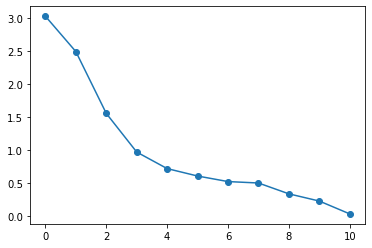

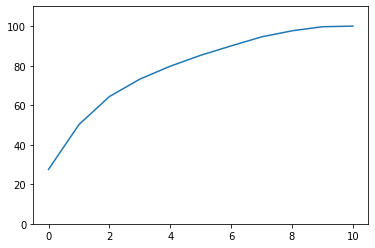

In [9]:
# Determining principal components

eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
order = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

# 'Scree' plot of eigenvalues
plt.plot(eigenvalues, 'o-')
plt.show()

# Cumulative percentage of eigenvalues
plt.plot(100 * eigenvalues.cumsum() / sum(eigenvalues))
plt.ylim((0, 110))
plt.show()

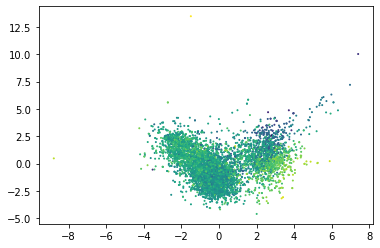

In [10]:
# Projection of data onto components (rotation of data)

projections = np.dot(zscores, eigenvectors)

plt.scatter(projections[:,0], projections[:,1], c=projections[:, 2], s=1)
plt.show()

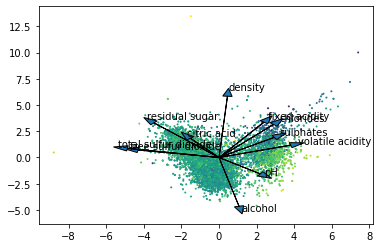

In [11]:
# Biplot showing projections and directions of original variables

variables = wine.columns[1:12]

plt.scatter(projections[:,0], projections[:,1], c=projections[:, 2], s=1)
for var, (x,y) in zip(variables, 10*eigenvectors[:, :2]):
    plt.arrow(0, 0, x, y, head_width=0.5)
    plt.text(1.1*x, 1.1*y, var)
plt.show()


## Factor Analysis (FA)

https://en.wikipedia.org/wiki/Factor_analysis

Factor analysis differs from PCA in that it assumes that the data and the covariances are the result of a  small, typically known, number of underlying (hidden or latent) variables. The aim of FA is to identify the nature of these underlying variables. It is further assumed that each of these latent variables has a _simple structure_, which means that it is coupled to a limited number of the direct observable variables. 

FA starts with performing PCA, followed by selection of a number of components that is assumed to span the _latent variable space_. These components are then rotated in the _variable space_, such that each component has a structure that is as simple as possible. A popular method for this is the _varimax_ rotation that maximizes the sum of variances over the _rows_ of the selected components. Other rotations are _orthomax_ and _quartimax_. All three preserve the orthogonality of the components. The resulting simple structures of the components make it typically more easy to interpret the results than is the case with PCA. Oblique rotations, which allow non-orthogonal components, are sometimes also used, but these may again be difficult to interpret.

Some additional explanation on the different types of rotations can be found on https://stats.stackexchange.com/questions/185216/factor-rotation-methods-varimax-oblimin-etc-what-do-the-names-mean-and-wh



#### Code

In [19]:
def varimax(components, gamma=1, maxiter=20, tol=1e-8):
    """Perform VariMax (gamma=1) or OrthoMax (gamma=0) rotation on components"""
    p,k = components.shape
    R   = np.eye(k)
    f   = float(gamma)/p
    d   = 0
    for i in range(maxiter):
        d_old = d
        L = np.dot(components, R)
        A = L**3 - f * (L*(L**2).sum(axis=0))**2
        U,s,V = np.linalg.svd(np.dot(components.T,A))
        R = np.dot(U,V)
        d = sum(s)
        if (d - d_old)**2 < tol: 
            break
    return np.dot(components, R)

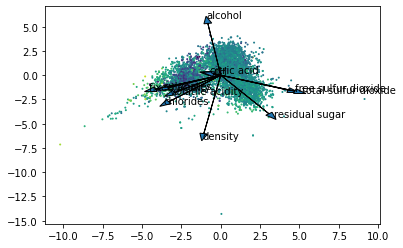

In [20]:
# Using the wine example 

V = varimax(eigenvectors[:, :3])

fa_projections = np.dot(zscores, V)
plt.scatter(fa_projections[:,0], fa_projections[:,1], c=fa_projections[:, 2], s=1)
for var, (x,y) in zip(variables, 10*V[:, :2]):
    plt.arrow(0, 0, x, y, head_width=0.5)
    plt.text(1.1*x, 1.1*y, var)
plt.show()

## Singular Value Decomposition (SVD)

https://en.wikipedia.org/wiki/Singular_value_decomposition

The short explanation of the SVD is that it aims at finding two rotation matrices $\bf{U}$ and $\bf{V}$ for two data set $\bf{X}$ and $\bf{Y}$, such that the matrix of inner products of the two $({\bf{XU}})^T{\bf{YV}}$ after rotation is diagonal.

While the PCA rotation of one dataset rotates it such that the first component has the largest variance, the second the second largest variance, and so on, the SVD rotations rotate both data sets such that the two first components have the highest variance, the two second components have the second highest covariance, and so on. Likewise, where the covariance between any two non-equal components is zero in PCA, any two components from either data set, which have unequal indices have zero covariance in SVD. In this context, the SVD is sometimes explicitly called 'Maximum Covariance Analysis'.

In the above sense, the SVD applies to cross-covariance matrices (covariance matrices from the inner product of two data sets). However, every matrix could be considered or even written as a cross-covariance matrix of some two data matrices, and the SVD is thus not restricted to actual ones, but can be used to write any matrix as two 'rotation' (singular vector) matrices and a diagonal matrix of singular values:

$$
{\bf{S}} = {\bf{U}}{\bf{\Lambda}}{\bf{V}}^T
$$


## Procrustes Analysis (PA)

https://en.wikipedia.org/wiki/Procrustes_analysis

Procrustes Analysis aims at finding the optimal superposition of two datasets of equivalent points by translation, rotation and scaling. The result of the operation is that the sum of squared distances between equivalent points is minimized. Applications include, e.g., matching images.

The problem can be phrased as having two datasets $\bf{X}$ and $\bf{Y}$ of equal dimensions, with matched rows. It's easiest to first center both data sets, because that settles the translation part. Solving the problem then involves minimizing the $D^2$, the sum of squared distances

$$
D^2 = \text{tr}\,({\bf{X}} - {\bf{YR}})^T({\bf{X}} - {\bf{YR}})
$$

This is just the Euclidean distance and can be expanded to

$$
D^2 = \text{tr}\,{\bf{X}}^T{\bf{X}} + \text{tr}\,({\bf{YR}})^T{\bf{YR}} 
-\text{tr}\, {\bf{X}}^T{\bf{YR}} -\text{tr}\, {\bf{YR}}^T{\bf{X}}
$$

Now note that transposition does not change the trace, so the last two terms are equal and can be replaced. Further note that the inner product of a matrix does not change with rotation, so we can rewrite the above to 

$$
D^2 = \text{tr}\,{\bf{X}}^T{\bf{X}} + \text{tr}\,{\bf{Y}}^T{\bf{Y}} 
-2 \text{tr}\, {\bf{X}}^T{\bf{YR}} 
$$

So we obtain an equation for $D^2$ that is to be minimized with respect to the rotation $R$, and that rotation only occurs in the last term. The first two terms are constant for every $R$, and since the last term is a subtraction, minimizing $D^2$ is thus equal to maximizing the trace of the matrix ${\bf{X}}^T{\bf{YR}}$. Now any matrix has maximal trace if all the information is on the diagonal, and this can be done with the SVD

$$
{\bf{X}}^T{\bf{Y}} = {\bf{U \Lambda V}}^T
$$

and

$$
\text{tr} \, {\bf{U}}^T{\bf{X}}^T{\bf{Y}}{\bf{V}} = \text{tr} \, {\bf{\Lambda}}
$$

At this point it helps to know that the trace of a matrix product does not change if a matrix is shifted from the left side to the right, or vice versa, so we can change the equation above to 

$$
\text{tr} \, {\bf{X}}^T{\bf{Y}}{\bf{V}}{\bf{U}}^T = \text{tr} \, {\bf{\Lambda}}
$$

and it becomes evident that the distance minimizing rotation ${\bf{R}} = {\bf{VU}}^T$.

## Principal Component Regression (PCR)

https://en.wikipedia.org/wiki/Principal_component_regression

Principal component regression is principal component analysis of the dataset of potential independent variables to obtain a limited set of orthogonal components, which are then used for regression. 

## Partial Least Squares Regression (PLSR)

https://en.wikipedia.org/wiki/Partial_least_squares_regression



In [ ]:
def normalize(v):
    """Normalize a vector"""
    return v / np.sqrt((v ** 2).sum())


class PLS2:
    def __init__(self, X, Y, components=-1, threshold=1e-8):
        E = X.copy()
        F = Y.copy()
        
        nx, mx = E.shape
        ny, my = F.shape
        
        if components < 0:
            components = min(nx, mx, my)
        else:
            components = min(components, nx, mx, my)
        
        # Initialization
        self.W = np.zeros((mx, components)) # 
        self.T = np.zeros((nx, components)) # X factor scores
        self.P = np.zeros((mx, components)) # X factor loadings
        self.C = np.zeros((my, components)) # Y component loadings
        self.U = np.zeros((ny, components)) # Y component scores
        self.b = np.zeros(components)       # regression coefficients
        
        # Calculation
        for k in range(components):
            u = F[:, F.var(axis=0).argmax()]
            prev = np.zeros(nx)
            # Power iteration
            while ((u - prev) ** 2).sum() > threshold:
                prev = u
                w = normalize(E.T @ u)
                t = normalize(E @ w)
                c = normalize(F.T @ t)
                u = F @ c
            # Regression coefficient
            b[k] = (t * u).sum()
            # Storing
            self.P[:, k] = E.T @ t
            self.W[:, k] = w
            self.T[:, k] = t
            self.C[:, k] = c
            self.U[:, k] = u
            
            # Deflation
            E -= t[:, None] * p[None, :]
            F -= b[k] * t[:, None] * c[None, :]
            

## Canonical Correlation Analysis (CCA)

https://en.wikipedia.org/wiki/Canonical_correlation



## Generalized Principal Component Analysis (GPCA)

See: https://www.sciencedirect.com/science/article/pii/S0167947300000244



## Generalized Singular Value Decomposition (GSVD)

## Generalized Procrustes Analysis (GPA)

## Multiset Canonical Correlation Analysis (MCCA)

## Multiset Partial Least Squares (MPLS)

## Multidimensional Scaling (MDS)

https://en.wikipedia.org/wiki/Multidimensional_scaling

Multidimensional scaling or Principal Coordinate Analysis (PCoorA) is an application of PCA on a *dissimilarity matrix*, rather than on a covariance matrix, which is more like a *similarity matrix*. 

Say we have an $n$ by $n$ dissimilarity matrix from $n$ observations. The objective of MDS is then finding $n$ vectors in a $k$-dimensional space such that the dissimilarity matrix of these new vectors is as close as possible to the original matrix. In casual terms, MDS assigns coordinates to observations based on dissimilarities. 

The objective of MDS is not too different from that of PCA on a covariance matrix. If we have an $n$ by $n$ covariance matrix from $n$ observations, then the objective of PCA can be phrased as assigning $k$-dimensional coordinates to these observations, such that the covariance matrix of these coordinates is as close as possible to the original one for any choice of $k$.

To illustrate the MDS in light of the relation with standard PCA, let $\bf{a}$, $\bf{b}$, $\bf{c}$, $\bf{d}$, and $\bf{e}$ denote five vectors in some variable space. We here assume that this is a regular, say Cartesian, space. The distance squared between any two points can be written (here for $\bf{a}$ and $\bf{b}$) as 

$$
d_{ab}^2 = ({\bf{a}} - {\bf{b}})^T ({\bf{a}} - {\bf{b}})
= {\bf{a}}^T {\bf{a}} + {\bf{b}}^T {\bf{b}} - 2 {\bf{a}}^T{\bf{b}}
$$

The matrix of all distances squared can then be written as 

$$
{\bf{D}}^2 = \begin{pmatrix}
{\bf{a}}^T {\bf{a}} + {\bf{a}}^T {\bf{a}} - 2 {\bf{a}}^T{\bf{a}} &
\cdots &
{\bf{a}}^T {\bf{a}} + {\bf{e}}^T {\bf{e}} - 2 {\bf{a}}^T{\bf{e}} \\
\vdots & \ddots & \vdots \\
{\bf{e}}^T {\bf{e}} + {\bf{a}}^T {\bf{a}} - 2 {\bf{e}}^T{\bf{a}} &
\cdots &
{\bf{e}}^T {\bf{e}} + {\bf{e}}^T {\bf{e}} - 2 {\bf{e}}^T{\bf{e}} 
\end{pmatrix}
$$

Because the distances are shift-invariant, we can set any of our points as the origin, so we take $\bf{a}$. But if $\bf{a}$ is the origin, any distance squared with respect to it  will be the inner product of the corresponding point, and the matrix can be rewritten:

$$
{\bf{D}}^2 = \begin{pmatrix}
0 & 
{\bf{b}}^T{\bf{b}} & 
\cdots & 
{\bf{e}}^T{\bf{e}} \\
{\bf{b}}^T{\bf{b}} & 
{\bf{b}}^T {\bf{b}} + {\bf{b}}^T {\bf{b}} - 2 {\bf{b}}^T{\bf{b}} &
\cdots &
{\bf{b}}^T {\bf{b}} + {\bf{e}}^T {\bf{e}} - 2 {\bf{b}}^T{\bf{e}} \\
\vdots & 
\vdots & 
\ddots & 
\vdots \\
{\bf{e}}^T {\bf{e}} &
{\bf{e}}^T {\bf{e}} + {\bf{b}}^T {\bf{b}} - 2 {\bf{e}}^T{\bf{b}} &
\cdots &
{\bf{e}}^T {\bf{e}} + {\bf{e}}^T {\bf{e}} - 2 {\bf{e}}^T{\bf{e}} 
\end{pmatrix}
$$

Now subtracting the top row from all rows and the first column from all columns and dividing by $-2$ gives the matrix of sums-of-squares and crossproducts $\bf{S}$

$$
{\bf{S}} = \begin{pmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & {\bf{b}}^T{\bf{b}} & {\bf{b}}^T{\bf{c}} & {\bf{b}}^T{\bf{d}} & {\bf{b}}^T{\bf{e}} \\
0 & {\bf{c}}^T{\bf{b}} & {\bf{c}}^T{\bf{c}} & {\bf{c}}^T{\bf{d}} & {\bf{c}}^T{\bf{e}} \\
0 & {\bf{d}}^T{\bf{b}} & {\bf{d}}^T{\bf{c}} & {\bf{d}}^T{\bf{d}} & {\bf{d}}^T{\bf{e}} \\
0 & {\bf{e}}^T{\bf{b}} & {\bf{e}}^T{\bf{c}} & {\bf{e}}^T{\bf{d}} & {\bf{e}}^T{\bf{e}} \\
\end{pmatrix}
$$

With ${\bf{a}} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$ it is obvious that this matrix is obtained as ${\bf{X}}^T{\bf{X}}$ with the coordinates ${\bf{X}} = \begin{pmatrix} {\bf{a}} \\ \vdots \\ {\bf{e}} \end{pmatrix}$ with any rotation. Vice versa, the eigen decomposition must then yield those coordinates with some rotation:

$$
{\bf{S}} = {\bf{PD}}^{\frac{1}{2}}{\bf{DP}} = {\bf{R}}^T{\bf{X}}^T{\bf{X}}{\bf{R}}
$$

The rotation is not arbitrary, but corresponds to the rotation of the points, such that the first coordinate has maximal inner product, the second coordinate has the next maximal inner product, etc. However, the coordinates thus assigned to the observations have the origin at one of the points. The choice is arbitrary, but affects the rotation. The result is equal to the result from PCA if the origin is set at the center of the distribution. Then the first coordinate corresponds to the direction of maximal distances between the observations. 

Gower (1966) presented the method as Principal Coordinate Analysis with a method to infer the center of mass from the distance matrix and set that as origin. 

The method is particularly useful if distances between observations are more easily determined or have clearer meaning than actual coordinates. It is often used prior to clustering, since it is typically possible to use a space of limited dimensions to capture as much as possible of the dissimilarities.

### Example 1: A simple illustration

Consider a set of five random points in 3D space:

In [13]:
X = np.random.random(15).reshape((5, 3))

In [15]:
D = ((X[None, :, :] - X[:, None, :])**2).sum(axis=2)
m = D.mean(axis=0)
A = -0.5 * (D - m[:, None] - m[None, :] + m.mean())

vals, vecs = np.linalg.eig(A)

# Only three non-zero eigenvalues, because the data is in 3D
print(vals.round(5))

# New (principal) coordinates
Y = vecs[:, :3] * vals[:3]**0.5

# Proving that both point sets have the same distance structure:
print()
print((D - ((Y[None, :, :] - Y[:, None, :])**2).sum(axis=2)).round(5))

# Showing that the point sets are equal (see Procrustes Analysis):
print()
print(((X - X.mean(axis=0))**2).sum() + (Y**2).sum() - 2*np.linalg.svd(X.T @ Y, compute_uv=False).sum())

[ 0.61654  0.1957   0.00439 -0.       0.     ]

[[ 0. -0. -0.  0.  0.]
 [-0.  0. -0.  0.  0.]
 [-0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]

-6.661338147750939e-16


In [43]:
from sklearn.manifold import MDS
embedding = MDS(n_components=3, dissimilarity='precomputed')
Z = embedding.fit_transform(D**0.5)

print(Y)
print()
print(Z)

# But this approach does not preserve the distance structure...
print("\nThe difference between the original and the final distance matrix:")
print((D**0.5 - ((Z[None, :, :] - Z[:, None, :])**2).sum(axis=2)**0.5).round(5))

# ... and the point sets are not equal...
print("\nThe Procrustean distance (MSD) between the before and after coordinates:")
print(((X - X.mean(axis=0))**2).sum() + (Z**2).sum() - 2*np.linalg.svd(X.T @ Z, compute_uv=False).sum())

# ... I'll have to check the differences between the algorithms on this ... :(

[[-0.18084086  0.14881915 -0.05193052]
 [ 0.19995968  0.17412411  0.03960642]
 [ 0.75695423 -0.10570748 -0.00160976]
 [-0.21503446 -0.14383397 -0.02391562]
 [-0.56103858 -0.07340181  0.03784947]]

[[-0.19396137  0.15002076 -0.0922594 ]
 [-0.1057803   0.00523898  0.26724126]
 [ 0.26562914 -0.43145788  0.56473575]
 [ 0.07611585  0.1313843  -0.20301301]
 [-0.04200332  0.14481385 -0.53670458]]

The difference between the original and the final distance matrix:
[[ 0.      -0.005   -0.01742  0.00347 -0.0203 ]
 [-0.005    0.      -0.02118  0.00689 -0.01822]
 [-0.01742 -0.02118  0.       0.00235  0.03839]
 [ 0.00347  0.00689  0.00235  0.       0.00423]
 [-0.0203  -0.01822  0.03839  0.00423  0.     ]]

The Procrustean distance (MSD) between the before and after coordinates:
0.024344725161513647


## Spectral Graph Partitioning (SGP)

https://en.wikipedia.org/wiki/Graph_partition#Spectral_partitioning_and_spectral_bisection

Spectral Graph Partitioning is an application of PCA on a *graph*. For this, the graph is represented as a *Laplacian matrix*, which has a $-1$ for every connected nodes $i$ and $j$, and has the number of connections for each node on the diagonal. The eigenvectors of this matrix then represent a way of partitioning the graph in such a way that at every division the least connections are broken.

If the graph is not disjoint (i.e. consisting of more than one piece), the first eigenvector of this matrix is equal to $\frac{1}{\sqrt{n}}\bf{1}$.

## Independent Component Analysis (ICA)

https://en.wikipedia.org/wiki/Independent_component_analysis

Independent Component Analysis determines components such that the distributions of scores are as non-Gaussian as possible and/or the *mutual information* between a component and the remainder of the data is minimized. The term mutual information refers to the overall (in)dependence of two data sets (variables), rather than only the linear (in)dependence (correlation) or (in)dependence according to some other specific relationship (GLM, NLS). 

## Linear Discriminant Analysis (LDA)

https://en.wikipedia.org/wiki/Linear_discriminant_analysis

Linear Discriminant Analysis finds the component that maximizes the separation of two groups $X$ and $Y$ in the data. If $\bar{\bf{x}}$ and $\bar{\bf{y}}$ are the respective means of the two groups and $\bf{S}$ is the *pooled covariance matrix*

$$
{\bf{S}} = \frac{(n_x - 1){\bf{S}}_x + (n_y - 1){\bf{S}}_y}{n_x + n_y - 2}
$$

then LDA gives a single component $\bf{a}$

$$
{\bf{a}} = {\bf{S}}^{-1} (\bar{\bf{x}} - \bar{\bf{y}})
$$

The scores of $X$ and $Y$ on $\bf{a}$ will have distributions with means and variances such that a t-test will give the maximum possible (squared) critical value. 

It is possible to deflate the data to remove the projection onto the LDA component. A subsequent PCA on the deflated data gives the principal directions of variance that are orthogonal to the direction of maximum discrimination. Plotting the projection on the discriminating axis and on the first pc of the deflated data then allows comparing the variance contributions associated with either direction and so assess the significance of the separation. A caveat of LDA is that the difference found to be most significant may be in directions that are themselves not very relevant in terms of data spread.

### Example:

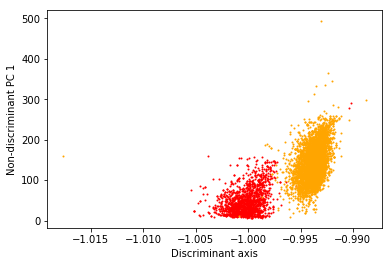

In [48]:
# Preparation and reading of data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = pd.read_csv('wine.csv')
grandmean = wine.values[:, 1:11].mean(axis=0)

white = np.array(wine[wine.Type == 'W'].values[:, 1:12], dtype=float)
red = np.array(wine[wine.Type == 'R'].values[:, 1:12], dtype=float)

mw = white.mean(axis=0)
mr = red.mean(axis=0)

nw = white.shape[0]
nr = red.shape[0]

Sw = np.cov(white.T)
Sr = np.cov(red.T)

# The pooled covariance matrix
Sp = ((nr - 1) * Sr + (nw - 1) * Sw) / (nr + nw - 2)

# The discriminant axis
a = np.linalg.inv(Sp) @ (mw - mr)
a /= np.sqrt((a ** 2).sum())

# Projecting the data onto the discriminant axis
tw = white @ a
tr = red @ a

# Deflate both groups
Ew = white - tw[:, None] * a[None, :]
Er = red - tr[:, None] * a[None, :]

# Combine
X = np.concatenate((Ew, Er), axis=0)
S = np.cov(X.T)
vals, vecs = np.linalg.eig(S)
order = vals.argsort()[::-1]
vecs = vecs[:, order]
vals = vals[order]
Tw = white @ vecs
Tr = red @ vecs

# Plot
plt.scatter(tr, Tr[:, 0], s=1, c="red")
plt.scatter(tw, Tw[:, 0], s=1, c="orange")
plt.xlabel("Discriminant axis")
plt.ylabel("Non-discriminant PC 1")    
plt.show()

## Kernel PCA (kPCA)

https://en.wikipedia.org/wiki/Kernel_principal_component_analysis

In kernel PCA, the covariance matrix is replaced by an alternative matrix of similarities. This matrix can be obtained from an operation on the elements of a covariance matrix, but can also be obtained from, e.g., a distance (dissimilarity) matrix, which can be turned into a matrix of similarities by exponentiation of the elements. In general, the covariance matrix is replaced by a matrix ${\bf{K}}$ of which the elements result from application of a function, the *kernel* function $k({\bf{x}}_i,{\bf{x}}_j)$, to the observations ${\bf{x}}_i$ and ${\bf{x}}_j$.

## Non-central PCA

Non-central PCA is what you get if the mean is not subtracted before determining the eigenvectors. In most cases, that's not a good idea. It is a decomposition of the non-central covariance matrix, which is the *raw* second moment of the multivariate distribution, using $s_{ij} = \frac{1}{n} {\bf{x}}_i^T {\bf{x}}_j$, rather than $s_{ij} = \frac{1}{n-1} ({{\bf{x}}_i} - {\bf{\bar{x}}})^T ({{\bf{x}}_i} - {\bf{\bar{x}}})$. The effect of it is that the resulting components encode both location and spread. 

Non-central PCA may be useful if the origin has a specific role in relation to the data. This may be the case if, e.g., the origin is known to be the center of rotation of the data.

## Non-linear PCA

## Generalized Linear Model (GLM)

## Multivariate GLM

## Non-linear Least Squares (NLS)

## Stochastic Neighbor Embedding (SNE)

https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

Stochastic Neighbor Embedding, and its derivative t-distributed Stochastic Neighbor Embedding (t-SNE) are dimensionality reduction methods that aim at preserving the local neighborhoods of the observations. Essentially, this means that the distances of points close in space are preserved, but larger distances are stretched to give a better separation.

The module **tsne.py** was downloaded from the github repository of the author, Laurens van der Maaten.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tsne

print("Running example on 2,500 MNIST digits...")
X = np.loadtxt("tsne_python/mnist2500_X.txt")
labels = np.loadtxt("tsne_python/mnist2500_labels.txt")

dimensions = 2
components = 50
perplexity = 20.0

Y = tsne.tsne(X, dimensions, components, perplexity)

plt.scatter(Y[:, 0], Y[:, 1], 20, labels)
plt.show()
